In [1]:
import feature_eng.utils as utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [20]:
X_train, y_train, X_test, y_test = utils.get_train_test_sets()

Loading data ...


/home/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Cleaning data and feature engineering...
Spliting data into training and testing...
Done


In [ ]:
len(X_train)

In [ ]:
X_train.loc[3160:3170]

In [ ]:
X_test.head()

Change DataFrame to matrix 

In [21]:
y_train_trans=np.arctan(32.0301149*(-0.005208795+y_train))/3.141593

In [22]:
X_train_m, X_test_m, y_train_m, y_test_m = list(map(lambda x: x.as_matrix(), (X_train, X_test, y_train_trans, y_test)))

Random Forests example

In [23]:
rfclassifier = RandomForestRegressor(n_estimators=10)
rfclassifier.fit(X_train_m, y_train_m)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [24]:
y_test_predict = rfclassifier.predict(X_test_m)

In [25]:
y_test_predict_trans=0.0052088+0.0312206*np.tan(3.141593*y_test_predict)

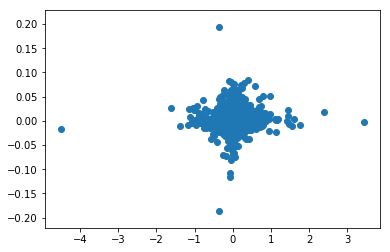

In [26]:
plt.scatter(y_test_m, y_test_predict_trans)

In [27]:
np.mean(abs(y_test_m - y_test_predict_trans))

0.066407369661890758

# Wrap up

In [5]:
import evaluator

In [9]:
ev = evaluator.Evaluator()
ev.load_train_test((X_train, y_train, X_test, y_test))

In [10]:
ev.fit(RandomForestRegressor(n_estimators=10))

Fitting from training data
Predicting
Training set 0.0960392041679
Testing set 0.247058417671


Fitting from training data
Predicting
Training set 0.0335747407458
Testing set 0.0814453411737